In [1]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


# Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [14]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 0.23.1


In [16]:
# loading the pre-processed dataset
data = pd.read_csv('loan_pred_OHE_train_data.csv')
test_data = pd.read_csv('loan_pred_OHE_test_data.csv')

In [18]:
# looking at the first five rows of the dataset
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.070489,0.000000,0.172214,0.74359,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.054830,0.036192,0.172214,0.74359,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.035250,0.000000,0.082489,0.74359,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.030093,0.056592,0.160637,0.74359,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.072356,0.000000,0.191027,0.74359,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [19]:
# checking missing values
data.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status                0
dtype: int64

In [20]:
# checking the data type
data.dtypes

ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female              float64
Gender_Male                float64
Married_No                 float64
Married_Yes                float64
Dependents_0               float64
Dependents_1               float64
Dependents_2               float64
Dependents_3+              float64
Education_Graduate         float64
Education_Not Graduate     float64
Self_Employed_No           float64
Self_Employed_Yes          float64
Property_Area_Rural        float64
Property_Area_Semiurban    float64
Property_Area_Urban        float64
Loan_Status                float64
dtype: object

In [22]:
#drop the Loan_ID variable
test_original = pd.Series()

#data = data.drop('Loan_ID',axis=1)
test_original['Loan_ID'] = test_data['Loan_ID']
test_data = test_data.drop('Loan_ID',axis=1)

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


KeyError: 'Loan_ID'

In [17]:
# looking at the shape of the data
data.shape

(614, 12)

In [18]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [19]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

## 2. Creating training and validation set

In [20]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_cv,y_train,y_cv = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [21]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_cv.shape, y_cv.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 3. Defining the architecture of the model

In [22]:
# checking the version of keras
import keras
print(keras.__version__)

Using TensorFlow backend.


2.3.1


In [23]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


### a. Create a model

<img src='https://drive.google.com/uc?id=1iZNZ3kwSHRNf-Irn3DZmMuBb6K-Lro7w'>

In [24]:
# importing the sequential model
from keras.models import Sequential

### b. Defining different layers

<img src='https://drive.google.com/uc?id=16X6De2hua1XJBe3dfmUUeGTgP6PbXEpc'>

In [25]:
# importing different layers from keras
from keras.layers import InputLayer, Dense 

<img src='https://drive.google.com/uc?id=1tsy4B6G0UN4-J4L4roOdoWQiZMUdgw2a'>

In [26]:
# number of input neurons
X_train.shape

(491, 11)

In [27]:
# number of features in the data
X_train.shape[1]

11

In [28]:
# defining input neurons
input_neurons = X_train.shape[1]

<img src='https://drive.google.com/uc?id=1xL_hM9rGItZjsZ8Lofwzw_9fZUi4bgJo'>

In [29]:
# number of output neurons

# since loan prediction is a binary classification problem, we will have single neuron in the output layer 

In [30]:
# define number of output neurons
output_neurons = 1

In [31]:
# number of hidden layers and hidden neurons

# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [32]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [33]:
# activation function of different layers

# for now I have picked relu as an activation function for hidden layers, you can change it as well
# since it is a binary classification problem, I have used sigmoid activation function in the final layer

In [34]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [35]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [36]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

110

In [37]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

120

In [38]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [39]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neurons + 1

6

## 4. Compiling the model (defining loss function, optimizer)

In [40]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## 5. Training the model

In [41]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=50)

Train on 491 samples, validate on 123 samples
Epoch 1/50
491/491 [==============================] - 0s 464us/step - loss: 0.6279 - accuracy: 0.6802 - val_loss: 0.6266 - val_accuracy: 0.6911
Epoch 2/50
491/491 [==============================] - 0s 35us/step - loss: 0.6209 - accuracy: 0.6823 - val_loss: 0.6190 - val_accuracy: 0.6911
Epoch 3/50
491/491 [==============================] - 0s 39us/step - loss: 0.6145 - accuracy: 0.6864 - val_loss: 0.6138 - val_accuracy: 0.6911
Epoch 4/50
491/491 [==============================] - 0s 43us/step - loss: 0.6087 - accuracy: 0.6864 - val_loss: 0.6103 - val_accuracy: 0.6911
Epoch 5/50
491/491 [==============================] - 0s 43us/step - loss: 0.6044 - accuracy: 0.6884 - val_loss: 0.6062 - val_accuracy: 0.6911
Epoch 6/50
491/491 [==============================] - 0s 39us/step - loss: 0.5999 - accuracy: 0.6904 - val_loss: 0.6026 - val_accuracy: 0.6911
Epoch 7/50
491/491 [==============================] - 0s 37us/step - loss: 0.5953 - accuracy: 0

## 6. Evaluating model performance on validation set

In [57]:
# getting predictions for the validation set
prediction = model.predict_classes(X_cv)
#prediction

In [58]:
# calculating the accuracy on validation set
accuracy_score(y_cv, prediction)

0.8130081300813008

### Visualizing the model performance

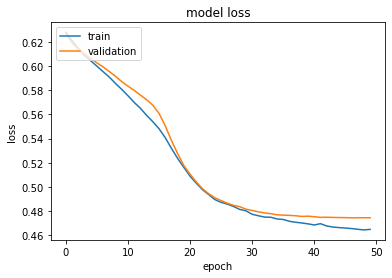

In [59]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

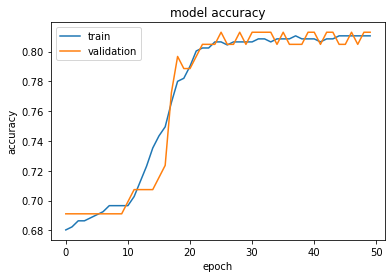

In [60]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [61]:
pred_test = model.predict_classes(test_data)


In [62]:
#Reading the sample submission file
submission = pd.read_csv('sample_submission_49d68Cx.csv')

submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [63]:
#we need Loan Status in terms of Y and N
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [65]:
#Converting it to csv format
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('NeuralNet.csv',index=False)

In [64]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
